In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch
from scipy.spatial import procrustes
from utils import utils

In [2]:
def evaluate(file_search='image_1', netV = 'v9', vertical=False):
    #file_search = 'image_59'
    r_img_1 = glob.glob('imagesReals_{}/*/{}.png'.format(netV, file_search))[0]
    #r_img_2 = glob.glob('imagesReals_{}/*/{}.png'.format(netV, file_search))[0]
    r_img_2 = glob.glob('imagesFake_{}/*/{}.png'.format(netV, file_search))[0]
    #print(r_img_1)
    img_1 = cv2.imread(r_img_1)
    img_2 = cv2.imread(r_img_2)
    #utils.plotTwoImages(img_1, img_2, ['Real', 'Fake'])
    img_1_part_1, img_1_part_2 = utils.segmentation(img_1, vertical)
    img_2_part_1, img_2_part_2 = utils.segmentation(img_2, vertical)
    #utils.plotTwoImages(img_1_part_1, img_1_part_2, ['Img 1 - Part 1', 'Img 1 - Part 2'])
    #utils.plotTwoImages(img_2_part_1, img_2_part_2, ['Img 2 - Part 1', 'Img  - Part 2'])
    landmarks_img_1 = utils.landmarks(cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY), 25)
    landmarks_img_2 = utils.landmarks(cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY), 25)
    landmarks_img_1_part_1 = utils.landmarks(img_1_part_1, 25)
    landmarks_img_1_part_2 = utils.landmarks(img_1_part_2, 25)
    landmarks_img_2_part_1 = utils.landmarks(img_2_part_1, 25)
    landmarks_img_2_part_2 = utils.landmarks(img_2_part_2, 25)

    #landmarks_img_1_part_1,landmarks_img_2_part_1, _ = procrustes(landmarks_img_1_part_1, landmarks_img_2_part_1)
    #landmarks_img_1_part_2,landmarks_img_2_part_2, _ = procrustes(landmarks_img_1_part_2, landmarks_img_2_part_2)
    return landmarks_img_1_part_1, landmarks_img_2_part_1, landmarks_img_1_part_2, landmarks_img_2_part_2 
    #landmarks_img_1,landmarks_img_2, _ = procrustes(landmarks_img_1, landmarks_img_2)

    #diff_imgs = torch.sqrt(torch.nn.functional.mse_loss(torch.Tensor(landmarks_img_1), 
                                  #torch.Tensor(landmarks_img_2)))

    #diff_imgs_part_1 = torch.sqrt(torch.nn.functional.mse_loss(torch.Tensor(landmarks_img_1_part_1), 
                                 #torch.Tensor(landmarks_img_2_part_1)))

    #diff_imgs_part_2 = torch.sqrt(torch.nn.functional.mse_loss(torch.Tensor(landmarks_img_1_part_2), 
                                 #torch.Tensor(landmarks_img_2_part_2)))


    #utils.plotLandmarks(landmarks_img_1, landmarks_img_2, ['{} - Img - 1'.format(netV), 'Img -2', 'RMSE {}'.format(diff_imgs)])
    #utils.plotLandmarks(landmarks_img_1_part_1, landmarks_img_2_part_1, ['Real - 1 - Part 1', 'Fake -2 - Part 1', 'RMSE {}'.format(diff_imgs_part_1)])
    #plt.savefig('row_part_1_{}.png'.format(netV), bbox_inches='tight',  dpi=300)
    #utils.plotLandmarks(landmarks_img_1_part_2, landmarks_img_2_part_2, ['Real - 1 - Part 2', 'Fake -2 - Part 2', 'RMSE {}'.format(diff_imgs_part_2)])
    #plt.savefig('row_part_2_{}.png'.format(netV), bbox_inches='tight',  dpi=300)

In [3]:
horizontal = [
    True,False,False,True,
    True,False,False,True,
    
    True,True,False,False,
    True,True,False,False,
    
    False,False,False,False,
    False,False,False,False,
    
    False,True,True,True,
    False,True,True,True,
    
    True, True, False, True,
    True, True, False, True,
    
    False, True, True, True,
    False, True, True, True,

    True, True, True, True,
    True, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, True, True, True,
    True, True, True, True,
    
    True, False, False, True,
    True, False, False, True,
    
    True, False, False, False,
    True, False, False, False,
    
    False, False, True, False,
    False, False, True, False,
    
    True, True, True, True,
    True, True, True, True,
    
    False, True, False, True,
    False, True, False, True,
    
    False, False, True, False,
    False, False, True, False,
    
    False, True, True, False,
    False, True, True, False,
    
    False, True, False, True,
    False, True, False, True,
    
    False, False, True, False,
    False, False, True, False,
    
    True, True, False, True,
    True, True, False, True,
    
    True, True, True, False,
    True, True, True, False,
    
    False, True, True, False,
    False, True, True, False,
    
    False, True, False, True,
    False, True, False, True,
    
    True, True, True, True,
    True, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, False, True, True,
    True, False, True, True,
    
    True, False, False, True,
    True, False, False, True,
    
    False, True, False, True,
    False, True, False, True,
    
    False, False, False, True,
    False, False, False, True,
    
    True, True, True, False,
    True, True, True, False,
    
    False, True, False, True,
    False, True, False, True,
        
    True, True, True, True,
    True, True, True, True,
    
    False, False, True, True,
    False, False, True, True,
    
    False, False, True, False,
    False, False, True, False,
    
    False, True, False, False,
    False, True, False, False,
    
    True, False, False, True,
    True, False, False, True,
    
    False, False, True, False,
    False, False, True, False,
    
    False, False, True, True,
    False, False, True, True,
    
    True, True, True, True,
    True, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, True, False, False,
    True, True, False, False,
    
    False, True, False, True,
    False, True, False, True,
    
    True, True, True, False,
    True, True, True, False,
    
    True, False, True, True,
    True, False, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    True, True, False, True,
    True, True, False, True,
    
    False, False, False, False,
    False, False, False, False,
    
    False, True, True, True,
    False, True, True, True,
    
    True, False, True, False,
    True, False, True, False,
    
    False, True, False, True,
    False, True, False, True,
    
    True, True, False, False,
    True, True, False, False,
    
    False, True, True, False,
    False, True, True, False,
    
    False, False, True,
    False, False, True,
    
    
]

In [4]:
len(horizontal) 

414

In [5]:
len(horizontal) / 8

51.75

In [6]:
falta = ['Tope','Tope','Tope','Tope','Base','Base','Base','Base'] *51
falta = falta + ['Tope','Tope','Tope','Base','Base','Base']

In [7]:
len(falta) 

414

In [8]:
real_part1 = []
real_part2 = []
fake_part1 = []
fake_part2 = []
for i, h, f in zip(range(len(horizontal)), horizontal, falta):
    if not(i in [153, 329, 299]): #234, 299, 234, 153
        landmarks_img_1_part_1, landmarks_img_2_part_1, landmarks_img_1_part_2, landmarks_img_2_part_2 = evaluate('image_{}'.format(i),'v9', vertical=h)
    real_part1.append(landmarks_img_1_part_1)
    real_part2.append(landmarks_img_1_part_2)
    fake_part1.append(landmarks_img_2_part_1)
    fake_part2.append(landmarks_img_2_part_2)

In [9]:
horizontal = np.logical_not(horizontal)

In [10]:
real_part1 = np.array(real_part1)[horizontal]
real_part2 = np.array(real_part2)[horizontal]
fake_part1 = np.array(fake_part1)[horizontal]
fake_part2 = np.array(fake_part2)[horizontal]
falta = np.array(falta)[horizontal]
indices = np.arange(len(horizontal))[horizontal]

In [11]:
horizontal = np.logical_not(horizontal)

In [12]:
def procrust_land(value, values_lands):
    landks = []
    for v in values_lands:
        l_part_1, l_part_2, _ = procrustes(value, v)
        landks.append(l_part_2)
    return np.array(landks)

In [13]:
real_part1 =  procrust_land(real_part1[0], real_part1)
fake_part1 =  procrust_land(real_part1[0], fake_part1)
real_part2 =  procrust_land(real_part2[0], real_part2)
fake_part2 =  procrust_land(real_part2[0], fake_part2)

In [14]:
from scipy.spatial import distance

In [15]:
def get_neighbors(value, x_pca, cant= 10):
    distances_x = []
    for x in x_pca:
        distances_x.append(distance.euclidean(value, x))
    indicex = np.argsort(np.array(distances_x))
    return np.array(x_pca)[indicex][0:cant], indicex[0:cant]

In [16]:
import numpy as np
from sklearn.decomposition import PCA

In [17]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
X_pca_real_part1 = pca.fit_transform(real_part1.reshape(real_part1.shape[0], -1))
X_pca_fake_part1 = pca.transform(fake_part1.reshape(fake_part1.shape[0], -1))

print(X_pca_real_part1.shape, pca.explained_variance_ratio_)

pca = PCA(n_components=2)
X_pca_real_part2 = pca.fit_transform(real_part2.reshape(real_part2.shape[0], -1))
X_pca_fake_part2 = pca.transform(fake_part2.reshape(fake_part2.shape[0], -1))

print(X_pca_real_part2.shape, pca.explained_variance_ratio_)

(186, 2) [0.66810549 0.22811923]
(186, 2) [0.57233197 0.15534981]


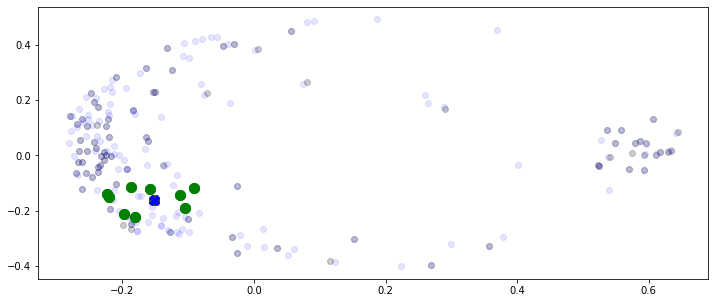

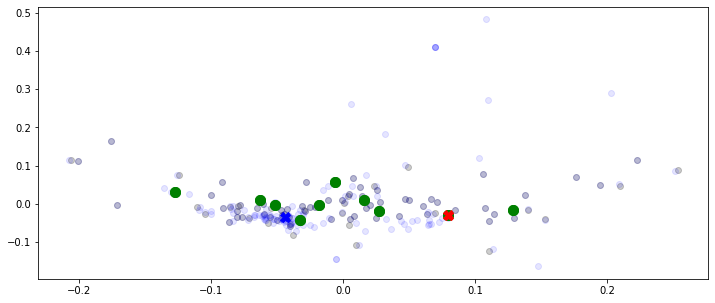

In [18]:
min_neighbors, min_index = get_neighbors(X_pca_real_part1[0], X_pca_real_part1, 20)
plt.figure(figsize=(12,5))
plt.plot(X_pca_real_part1[:, 0], X_pca_real_part1[:, 1], 'ok', alpha=0.1)
plt.plot(X_pca_fake_part1[:, 0], X_pca_fake_part1[:, 1], 'ob', alpha=0.1)
plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
plt.plot(X_pca_real_part1[0][0], X_pca_real_part1[0][1], 'Xr', markersize=10)
plt.plot(X_pca_fake_part1[0][0], X_pca_fake_part1[0][1], 'Xb', markersize=10)

min_neighbors = X_pca_real_part2[min_index]#get_neighbors(X_pca_real_part2[0], X_pca_real_part2, 5)
plt.figure(figsize=(12,5))
plt.plot(X_pca_real_part2[:, 0], X_pca_real_part2[:, 1], 'ok', alpha=0.1)
plt.plot(X_pca_fake_part2[:, 0], X_pca_fake_part2[:, 1], 'ob', alpha=0.1)
plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
plt.plot(X_pca_real_part2[0][0], X_pca_real_part2[0][1], 'Xr', markersize=10)
plt.plot(X_pca_fake_part2[0][0], X_pca_fake_part2[0][1], 'Xb', markersize=10)

In [19]:
def show_part1(min_neighbors, indx, title):
    plt.figure(figsize=(12,5))
    plt.plot(X_pca_real_part1[:, 0], X_pca_real_part1[:, 1], 'ok', alpha=0.1)
    plt.plot(X_pca_fake_part1[:, 0], X_pca_fake_part1[:, 1], 'ob', alpha=0.1)
    plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
    plt.plot(X_pca_fake_part1[indx][0], X_pca_fake_part1[indx][1], 'Xb', alpha=1, markersize=20)
    plt.plot(X_pca_real_part1[indx][0], X_pca_real_part1[indx][1], 'Xr', alpha=1, markersize=20)
    plt.title(title)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)

def show_part2(min_neighbors, indx, title):
    plt.figure(figsize=(12,5))
    plt.plot(X_pca_real_part2[:, 0], X_pca_real_part2[:, 1], 'ok', alpha=0.1)
    plt.plot(X_pca_fake_part2[:, 0], X_pca_fake_part2[:, 1], 'ob', alpha=0.1)
    plt.plot(min_neighbors[:, 0], min_neighbors[:, 1], 'og', markersize=10)
    plt.plot(X_pca_fake_part2[indx][0], X_pca_fake_part2[indx][1], 'Xb', alpha=1, markersize=20)
    plt.plot(X_pca_real_part2[indx][0], X_pca_real_part2[indx][1], 'Xr', alpha=1, markersize=20)
    plt.title(title)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)


In [20]:
def calcDistance(value, x_pca):
    distances_x = []
    for x in x_pca:
        distances_x.append(distance.euclidean(value, x))
    indicex = np.sort(np.array(distances_x))
    print(indicex)
    return indicex[0]

[8.04799994e-16 8.04799994e-16 5.54952458e-02 5.54952458e-02
 6.04953953e-02 6.04953953e-02 6.99835033e-02 6.99835033e-02
 7.56579309e-02 7.56579309e-02 8.06569727e-02 8.06569727e-02
 8.51376833e-02 8.51376833e-02 9.08894318e-02 9.08894318e-02
 9.12035148e-02 9.12035148e-02 9.19338820e-02 9.19338820e-02
 9.26297297e-02 9.26297297e-02 9.50008120e-02 9.50008120e-02
 9.52861788e-02 9.52861788e-02 9.90514826e-02 9.90514826e-02
 9.98353932e-02 9.98353932e-02 1.04392512e-01 1.04392512e-01
 1.05668717e-01 1.05668717e-01 1.08532572e-01 1.08532572e-01
 1.10509550e-01 1.10509550e-01 1.12834311e-01 1.12834311e-01
 1.16718877e-01 1.16718877e-01 1.19222769e-01 1.19222769e-01
 1.19357695e-01 1.19357695e-01 1.20325918e-01 1.20325918e-01
 1.22486882e-01 1.22486882e-01]
8.04799993585962e-16


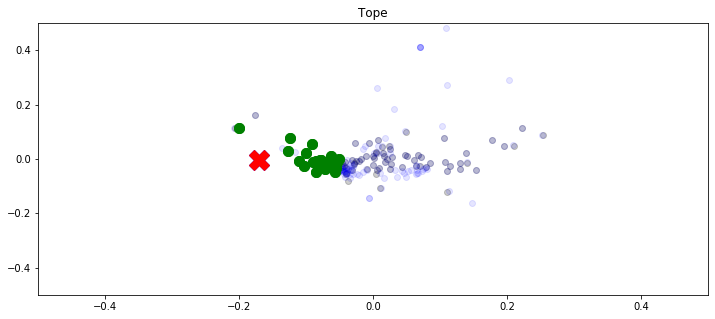

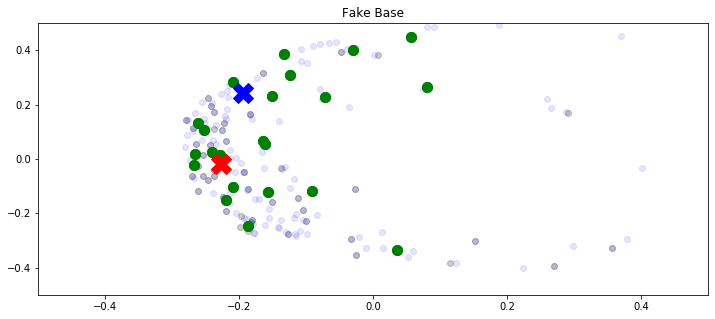

In [21]:
indx= 161
if falta[indx] != 'Base':    
    min_neighbors, min_index = get_neighbors(X_pca_real_part1[indx], X_pca_real_part1, 50)
    dist_tope = calcDistance(X_pca_fake_part1[indx], min_neighbors)
    show_part1(min_neighbors, indx, 'Base')
    min_neighbors = X_pca_real_part2[min_index]
    target_fake = X_pca_fake_part2[indx]
    show_part2(min_neighbors, indx, 'Fake Tope')
else:
    min_neighbors, min_index = get_neighbors(X_pca_real_part2[indx], X_pca_real_part2, 50)
    dist_base = calcDistance(X_pca_fake_part2[indx], min_neighbors)
    show_part2(min_neighbors, indx, 'Tope')
    min_neighbors = X_pca_real_part1[min_index]
    show_part1(min_neighbors, indx, 'Fake Base')
    target_fake = X_pca_fake_part1[indx]
    print(dist_base)
        

In [22]:
# 26

In [23]:
falta_base = []
falta_tope = []
base = []
tope = []
for indx in range(X_pca_real_part1.shape[0]):
    if falta[indx] != 'Base':    
        min_neighbors, min_index = get_neighbors(X_pca_real_part1[indx], 
                                                 X_pca_real_part1, 50)
        dist_base = calcDistance(X_pca_fake_part1[indx], [X_pca_real_part1[indx]])
        #dist_tope = calcDistance(X_pca_fake_part1[indx], min_neighbors)
        #show_part1(min_neighbors, indx, 'Fake Tope {}'.format(dist_tope))
        
        min_neighbors = X_pca_real_part2[min_index]
        #min_neighbors = X_pca_real_part2[indx]
        dist_tope = calcDistance(X_pca_fake_part2[indx], min_neighbors)
        #dist_base = distance.euclidean(X_pca_fake_part2[indx], X_pca_real_part2[indx])
        
        #show_part2(min_neighbors, indx, 'Base {}'.format(dist_base))
        #print('Falta Base:',  dist_base, ' Tope:',dist_tope )
        base.append(dist_base)
        falta_tope.append(dist_tope)
        print('Tope', indx, len(base))
                
    else:
        min_neighbors, min_index = get_neighbors(X_pca_real_part2[indx], 
                                                 X_pca_real_part2, 50)

        dist_tope = calcDistance(X_pca_fake_part2[indx], [X_pca_real_part2[indx]])
        #dist_base = calcDistance(X_pca_fake_part2[indx], min_neighbors)
        #show_part2(min_neighbors, indx, 'Tope {}'.format(dist_base))
        
        min_neighbors = X_pca_real_part1[min_index]
        #min_neighbors = X_pca_real_part1[indx]
        
        dist_base = calcDistance(X_pca_fake_part1[indx], min_neighbors)
        #dist_tope = distance.euclidean(X_pca_fake_part1[indx], X_pca_real_part1[indx])
        #show_part1(min_neighbors, indx, 'Fake Base {}'.format(dist_tope))
        #print('Falta Tope:', dist_tope , ' Base:', dist_base)
        falta_base.append(dist_base)
        tope.append(dist_tope)
        print('Base', indx, len(tope))
    



[1.96261557e-16]
[0.00484741 0.00484741 0.01130412 0.01130412 0.01367714 0.01367714
 0.02150817 0.02150817 0.03109793 0.03109793 0.03365194 0.03365194
 0.03528722 0.03528722 0.03766689 0.03766689 0.04131794 0.04131794
 0.04710432 0.04710432 0.04752625 0.04752625 0.04956647 0.04956647
 0.0522112  0.0522112  0.05283433 0.05283433 0.07243787 0.07243787
 0.07437414 0.07437414 0.07766258 0.07766258 0.0937284  0.0937284
 0.09931376 0.09931376 0.1052928  0.1052928  0.1203563  0.1203563
 0.12342327 0.12342327 0.17388288 0.17388288 0.19730229 0.19730229
 0.24395683 0.24395683]
Tope 0 1
[1.0264463e-15]
[0.01586208 0.01586208 0.01625256 0.01625256 0.02232957 0.02232957
 0.02476878 0.02476878 0.02594366 0.02594366 0.02765511 0.02765511
 0.02976364 0.02976364 0.04273582 0.04273582 0.0433274  0.0433274
 0.04708436 0.04708436 0.05168125 0.05168125 0.05323358 0.05323358
 0.05797257 0.05797257 0.05997209 0.05997209 0.0658788  0.0658788
 0.07586597 0.07586597 0.10234005 0.10234005 0.11406831 0.11406831


In [24]:
indices[44]

108

In [25]:
indx

185

In [26]:
np.array(tope).shape

(93,)

In [27]:
print(np.mean(tope), np.mean(base))
#0.12168202094895514 0.025655312358782677

0.0012216949501254028 0.0024675932417614114


In [28]:
np.sort(base)

array([5.55111512e-17, 6.93889390e-17, 8.77708367e-17, 1.11022302e-16,
       1.14439170e-16, 1.19446620e-16, 1.24126708e-16, 1.24126708e-16,
       1.30807992e-16, 1.30922788e-16, 1.39308124e-16, 1.41526222e-16,
       1.50791281e-16, 1.64066694e-16, 1.77722399e-16, 1.86190061e-16,
       1.88758322e-16, 1.94289029e-16, 1.96261557e-16, 2.04078992e-16,
       2.16777975e-16, 2.21284362e-16, 2.23772605e-16, 2.23772605e-16,
       2.24738766e-16, 2.28878340e-16, 2.32634115e-16, 2.35513869e-16,
       2.35922393e-16, 2.35922393e-16, 2.37143742e-16, 2.37143742e-16,
       2.39567761e-16, 2.42985164e-16, 2.48253415e-16, 2.51337427e-16,
       2.78616248e-16, 2.86097925e-16, 2.89776717e-16, 3.03492339e-16,
       3.05311332e-16, 3.05626573e-16, 3.20562630e-16, 3.23682852e-16,
       3.33355903e-16, 3.34221389e-16, 3.37661151e-16, 3.38799977e-16,
       3.45066108e-16, 3.48398816e-16, 3.77516643e-16, 3.92523115e-16,
       4.11915559e-16, 4.25711179e-16, 4.34622239e-16, 4.45442401e-16,
      

In [29]:
np.argsort(base)

array([34, 21, 90, 92, 58,  3, 91, 14, 67, 68, 36, 52, 70,  2, 23, 61, 86,
       48,  0, 30, 85, 16, 12, 82, 76,  9, 50, 28, 35, 72, 11, 27, 53,  8,
       49, 66, 81, 69, 10, 44, 22, 87, 42, 55, 38, 88, 46, 25, 62, 33, 37,
       56, 74, 54, 39, 47, 19, 84, 59, 71, 77, 64, 60,  5, 31, 65, 45, 51,
       79,  7, 89,  1,  4, 17, 20, 83,  6, 26, 40, 57, 18, 24, 15, 41, 80,
       29, 32, 73, 78, 63, 43, 13, 75])

In [30]:
print(np.mean(falta_tope), '+/-', np.std(falta_tope))
print(np.mean(falta_base), '+/-', np.std(falta_base))
#0.14081911511945747 +/- 0.08872512868947538
#0.028127280416559472 +/- 0.033943648767321075

0.047203084482033454 +/- 0.08662596301366539
0.06683105574529338 +/- 0.09179991605811458


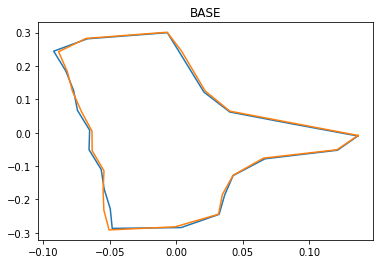

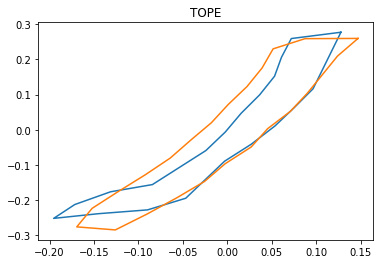

In [31]:
indx = 85
plt.figure()
plt.title('BASE')
plt.plot(fake_part1[indx][:, 0], fake_part1[indx][:, 1])
plt.plot(real_part1[indx][:, 0], real_part1[indx][:, 1])
plt.figure()
plt.title('TOPE')
plt.plot(fake_part2[indx][:, 0], fake_part2[indx][:, 1])
plt.plot(real_part2[indx][:, 0], real_part2[indx][:, 1])

In [32]:
np.save('base_plato_v9.npy', base)
np.save('tope_plato_v9.npy', tope)
np.save('falta_plato_tope_v9.npy', falta_tope)
np.save('falta_plato_base_v9.npy', falta_base)